#Descarga de librerias



In [1]:
!pip install chromadb langchain sentence-transformers pypdf huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.6 MB/s eta 0:00:00
 

In [2]:
!pip install gdown

In [3]:
!pip install PyPDF2 langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.7 MB/s eta 0:00:00


#Descarga de archivos CSV y PDF

In [4]:
import gdown
import os
import shutil

# Link a mi carpeta google drive
url = 'https://drive.google.com/drive/folders/1bVmZuitX1KEmQFtfRwQilqqZzN8B9Awg'

gdown.download_folder(url, quiet=True, output='Data_Viticulture')

carpeta_destino = 'viticultureindex_data'
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Mover todos los archivos de 'Data_Viticulture' a 'viticultureindex_data'
carpeta_origen = 'Data_Viticulture'
for filename in os.listdir(carpeta_origen):
    ruta_origen = os.path.join(carpeta_origen, filename)
    ruta_destino = os.path.join(carpeta_destino, filename)
    shutil.move(ruta_origen, ruta_destino)

# Eliminar la carpeta 'Data_Viticulture'
shutil.rmtree(carpeta_origen)

print("Archivos movidos con éxito.")

Archivos movidos con éxito.


In [5]:
carpeta_destino = 'viticultureindex_data'

# Listar archivos y sus nombres
archivos = os.listdir(carpeta_destino)
print(f"Archivos en '{carpeta_destino}':")
for archivo in archivos:
    print(archivo)

Archivos en 'viticultureindex_data':
viticulture_full_data.csv
Rules_viticulture.pdf
Viticulture_refresher.pdf
Rules_summary_viticulture.pdf
Viticulture_review.pdf
Cards_info.csv


#Creacion de las variables donde se guardan las fuentes de informacion

In [6]:
import PyPDF2
import re
from langchain.text_splitter import RecursiveCharacterTextSplitter  # Asegúrate de instalar langchain: pip install langchain

# Lista de archivos PDF a procesar
file_names = [
    'viticultureindex_data/Rules_viticulture.pdf',
    'viticultureindex_data/Viticulture_refresher.pdf',
    'viticultureindex_data/Rules_summary_viticulture.pdf',
    'viticultureindex_data/Viticulture_review.pdf'
]

# Carpeta de salida para los archivos generados
output_folder = '/content/viticulture_texts/'
os.makedirs(output_folder, exist_ok=True)

files_list = []
index_list = []
# Función para dividir el texto en partes más pequeñas
def split_text_into_parts(text):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20, separators=['\n\n', '\n'])
    return text_splitter.split_text(text)

# Procesar cada archivo PDF
for i, path in enumerate(file_names):
    with open(path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)

        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            text = page.extract_text()

            clean_text = re.sub(r'-\n', '', text)
            clean_text = re.sub(r'\s+', ' ', clean_text)

            # Dividir el texto en partes
            text_parts = split_text_into_parts(clean_text)
            # Guardar cada parte como un archivo de texto independiente
            for part_num, part_text in enumerate(text_parts):
                output_file = f'{output_folder}body_{i + 1}_page_{page_num + 1}_part_{part_num + 1}.txt'
                files_list.append(output_file)
                index_list.append(f'{i + 1},{page_num + 1},{part_num + 1}')
                with open(output_file, 'w') as f:
                    f.write(part_text)

# Confirmar los archivos generados
print("Archivos generados:")
for file_path in files_list:
    print(file_path)

Archivos generados:
/content/viticulture_texts/body_1_page_1_part_1.txt
/content/viticulture_texts/body_1_page_2_part_1.txt
/content/viticulture_texts/body_1_page_3_part_1.txt
/content/viticulture_texts/body_1_page_4_part_1.txt
/content/viticulture_texts/body_1_page_5_part_1.txt
/content/viticulture_texts/body_1_page_6_part_1.txt
/content/viticulture_texts/body_1_page_7_part_1.txt
/content/viticulture_texts/body_1_page_8_part_1.txt
/content/viticulture_texts/body_1_page_9_part_1.txt
/content/viticulture_texts/body_1_page_10_part_1.txt
/content/viticulture_texts/body_1_page_11_part_1.txt
/content/viticulture_texts/body_1_page_12_part_1.txt
/content/viticulture_texts/body_2_page_1_part_1.txt
/content/viticulture_texts/body_2_page_2_part_1.txt
/content/viticulture_texts/body_3_page_1_part_1.txt
/content/viticulture_texts/body_3_page_2_part_1.txt
/content/viticulture_texts/body_3_page_3_part_1.txt
/content/viticulture_texts/body_4_page_1_part_1.txt
/content/viticulture_texts/body_4_page_2_

#Creacion de BD de grafos manual


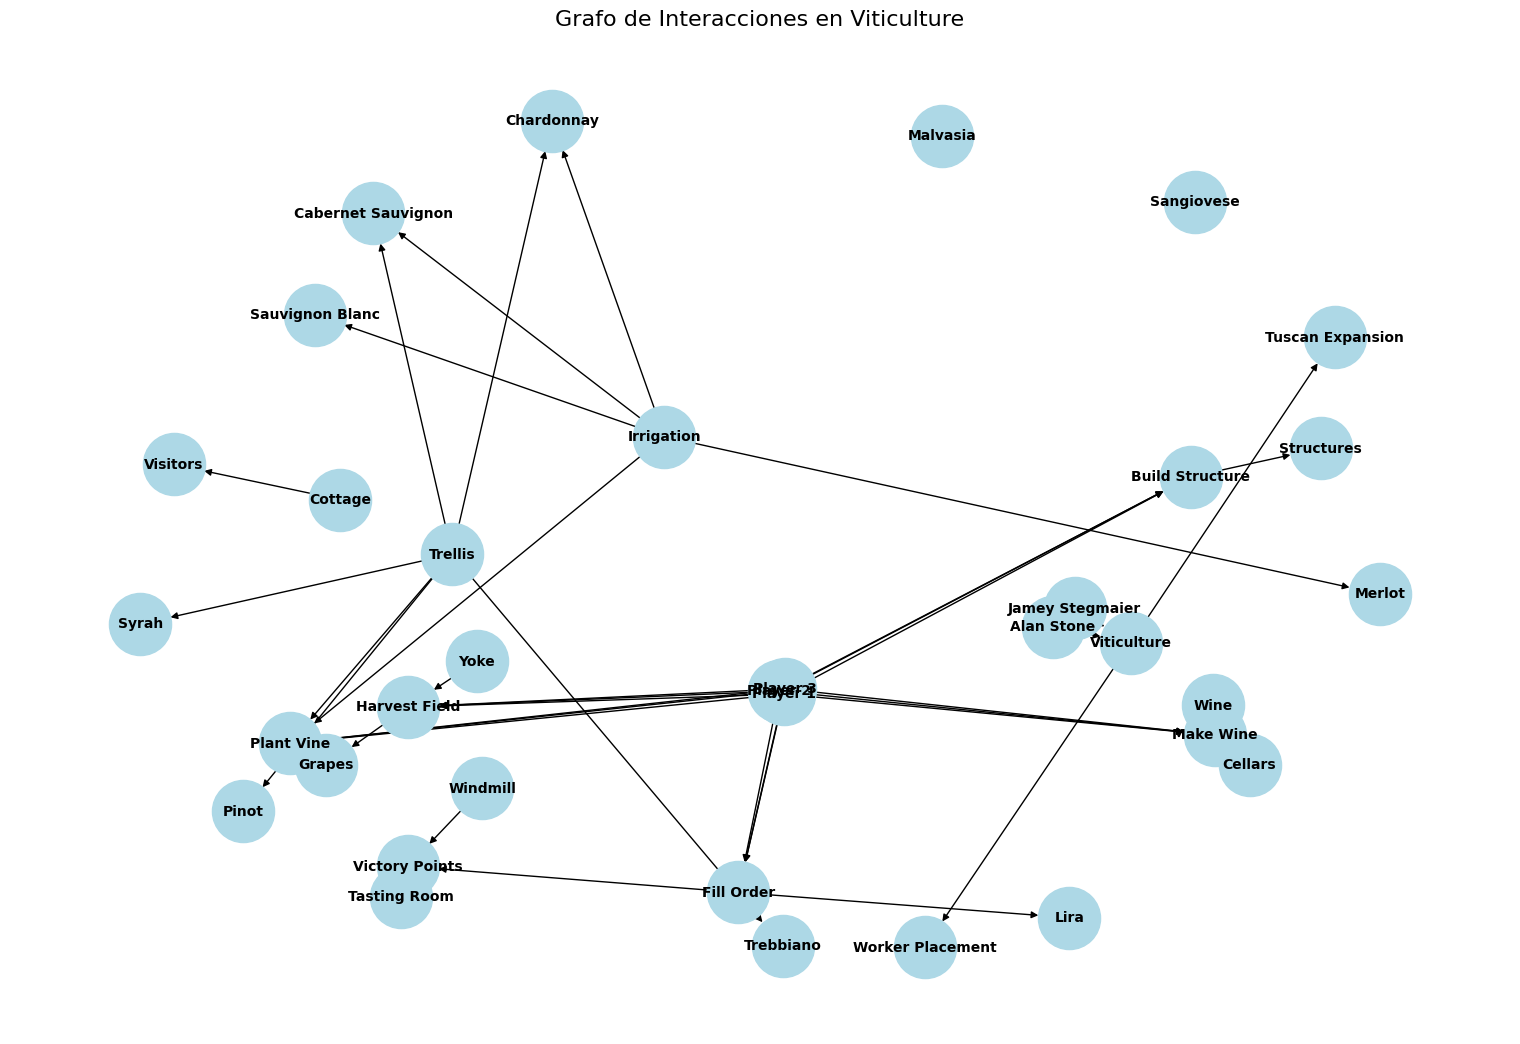

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafo dirigido que representa interacciones del juego
G = nx.DiGraph()

# Nodos principales: jugadores, acciones, recursos, estructuras
players = ["Player 1", "Player 2", "Player 3"]
actions = ["Plant Vine", "Harvest Field", "Build Structure", "Make Wine", "Fill Order"]
resources = ["Grapes", "Wine", "Lira", "Victory Points"]
structures = ["Trellis", "Irrigation", "Yoke", "Cellars", "Windmill", "Cottage", "Tasting Room"]

# Agregar nodos
G.add_nodes_from(players, category="Player")
G.add_nodes_from(actions, category="Action")
G.add_nodes_from(resources, category="Resource")
G.add_nodes_from(structures, category="Structure")

# Conexiones entre acciones y recursos
edges = [
    ("Plant Vine", "Grapes"),
    ("Harvest Field", "Grapes"),
    ("Make Wine", "Wine"),
    ("Fill Order", "Victory Points"),
    ("Fill Order", "Lira"),
    ("Build Structure", "Structures"),
]

# Conexiones entre jugadores y acciones (interacciones)
for player in players:
    for action in actions:
        edges.append((player, action))  # Los jugadores pueden realizar estas acciones

# Conexiones entre estructuras y acciones (restricciones o mejoras)
structure_edges = [
    ("Trellis", "Plant Vine"),
    ("Irrigation", "Plant Vine"),
    ("Yoke", "Harvest Field"),
    ("Cellars", "Make Wine"),
    ("Windmill", "Victory Points"),
    ("Cottage", "Visitors"),
    ("Tasting Room", "Victory Points"),
]

# Agregar aristas al grafo
G.add_edges_from(edges + structure_edges)
# Nodos
G.add_node("Viticulture", type="Game")
G.add_node("Jamey Stegmaier", type="Designer")
G.add_node("Alan Stone", type="Designer")
G.add_node("Worker Placement", type="Mechanic")
G.add_node("Tuscan Expansion", type="Expansion")

# Aristas
G.add_edge("Jamey Stegmaier", "Viticulture", relation="designed")
G.add_edge("Alan Stone", "Viticulture", relation="designed")
G.add_edge("Viticulture", "Worker Placement", relation="uses")
G.add_edge("Viticulture", "Tuscan Expansion", relation="has expansion")

wine_varieties = {
    "Sangiovese": {"Color": "Red", "Value": 1, "Prerequisite": None},
    "Malvasia": {"Color": "White", "Value": 1, "Prerequisite": None},
    "Pinot": {"Color": "Red & White", "Value": 1, "Prerequisite": "Trellis"},
    "Syrah": {"Color": "Red", "Value": 2, "Prerequisite": "Trellis"},
    "Trebbiano": {"Color": "White", "Value": 2, "Prerequisite": "Trellis"},
    "Merlot": {"Color": "Red", "Value": 3, "Prerequisite": "Irrigation"},
    "Sauvignon Blanc": {"Color": "White", "Value": 3, "Prerequisite": "Irrigation"},
    "Cabernet Sauvignon": {"Color": "Red", "Value": 4, "Prerequisite": "Trellis & Irrigation"},
    "Chardonnay": {"Color": "White", "Value": 4, "Prerequisite": "Trellis & Irrigation"}
}

# Agregar nodos de variedades de vino
for wine, attributes in wine_varieties.items():
    G.add_node(wine, category="Vine", color=attributes["Color"], value=attributes["Value"])

# Agregar conexiones a sus requisitos
for wine, attributes in wine_varieties.items():
    prerequisite = attributes["Prerequisite"]
    if prerequisite:
        if "Trellis" in prerequisite:
            G.add_edge("Trellis", wine)
        if "Irrigation" in prerequisite:
            G.add_edge("Irrigation", wine)

# Dibujar el grafo para visualizarlo
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold"
)
plt.title("Grafo de Interacciones en Viticulture", fontsize=16)
plt.show()


#Coleccion de chromaDB en la que se guardan los embeddings de los textos PDF para luego realizar una busqueda vectorial

In [7]:
import chromadb

client = chromadb.Client()

collection = client.create_collection("Viticulture")

In [8]:
documents = []
for i, txt in enumerate(files_list):
  with open(txt, 'r') as f:
    data = f.read().rstrip()
  documents.append(data)

In [9]:
!pip install tensorflow-text tensorflow-hub

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0


In [10]:
import tensorflow_text
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [11]:
# Calcular embeddings para los documentos
embeddings_list = embed(documents).numpy().tolist() # Convertir a lista para que sea serializable

In [12]:
collection.add(
    documents=documents,
    ids= index_list,
    embeddings=embeddings_list
)

In [13]:
def search_database(consulta):
  embedding_consulta = embed([consulta]).numpy().tolist()
  results = collection.query(
  query_embeddings=embedding_consulta,
  n_results=1
  )
  return results['documents'][0]

In [14]:
consulta = "What happens when making wine"
results = search_database(consulta)
results

['Sponsored by Eric & Lauren Horbinski Sd bE i Note 1: Discard excess tokens when creating blush or sparkling wine. Note 2: Players must build the appropriate cellar to house any wines, blushes, or sparkling wines above a value of 3 and 6. Note 3: Each wine icon on the cellar can fit exactly 1 wine token. This follows the same rules as explained in Note 2 in the Harvest section of page 10. Note 4: Once in the cellar, wine tokens may never be combined. Note 5: AA savvy player will make wine strategically based on the cellars he owns and the wine orders in his hand. After all, grapes in Viticulture age just like wine!Example 1: A player decides to make 2 red wine tokens, but he doesn’t have the medium cellar yet. The 1-value red grape becomes a 1-value red wine, and the 4-value red grape is devalued to become a 3-value red wine. Example 2: The player decides to make a blush wine token, so he combines a red and a white grape to form a single blush wine token equal to their cumulative valu

#LLM utilizado

In [16]:
from transformers import AutoTokenizer, AutoModelForCausalLM

LLM_MODEL_NAME = "bigscience/bloom-1b1"

tokenizer = AutoTokenizer.from_pretrained(LLM_MODEL_NAME)
llm_model = AutoModelForCausalLM.from_pretrained(LLM_MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

#Archivos CSV guardados

In [17]:
import pandas as pd
import networkx as nx
from langchain.chains import ConversationalRetrievalChain

csv_files = ['/content/viticultureindex_data/Cards_info.csv', '/content/viticultureindex_data/viticulture_full_data.csv']
csv_data = {file: pd.read_csv(file) for file in csv_files}

#Selector de fuente de informacion a usar con prompt engineering

In [18]:
def generate_llm_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = llm_model.generate(**inputs, max_length=512, do_sample=True, temperature=0.7, top_k=50)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Seleccionar la fuente adecuada
def select_source(query):
    """
    Usa un modelo para determinar qué fuente usar.
    """
    llm_prompt = f"""
    Basándote en la siguiente pregunta, decide cuál de las siguientes fuentes de conocimiento es más relevante para responder:
    - PDFs: Contienen reglas detalladas y extensas.
    - CSVs: Contienen datos tabulares.
    - Grafo: Contiene relaciones entre conceptos clave.

    Vas a alimentar a un modelo de lenguaje que tiene que responder preguntas sobre un juego de mesa. Si la pregunta es sobre relaciones entre entidades responde Grafo. Si la pregunta es
    sobre cantidades numericas responde CSVs y si la pregunta es sobre teoria general de las reglas del juego responde PDFs.

    Responde únicamente con "PDFs", "CSVs" o "Grafo". Tu respuesta debe ser UNA sola palabra, sin explicaciones adicionales.
    Vamos a ver unos ejemplos:
    Pregunta: "How many vine cards are there?"
    respuesta: "CSVs"

    Pregunta: "Which wine varieties require irrigation?"
    respuesta: "Grafo"

    Pregunta: "What is the value of a red wine?"
    respuesta: "CSVs"

    Pregunta: "When the last round is played?"
    respuesta: "PDFs"

    Pregunta: "How does a player wins the game?"
    respuesta: "PDFs"

    Pregunta: "{query}"
    respuesta:
    """
    inputs = tokenizer(llm_prompt, return_tensors="pt", max_length=512, truncation=True)

    outputs = llm_model.generate(**inputs, max_new_tokens=3, do_sample=False, temperature=0.0)

    response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    response = response.split("respuesta:")[-1].strip().split()[-1]
    '''if "CSVs" not in response and "PDFs" not in response and "Grafo" not in response:
        response = "PDFs" #valor por defecto en caso de error'''
    return response

In [ ]:
select_source("How many summer visitor cards are there?")

'"CSVs"'

In [ ]:
select_source("When can a player harvest a field?")

'"PDFs"'

In [ ]:
select_source("Which actions are related to victory points?")

'"PDFs"'

#Selector de informacion en los CSV

In [35]:
import pandas as pd
import re

def search_csv(query, csv_data):
    """
    Busca coincidencias en CSVs basándose en cada palabra completa de la query.
    """
    response = "Datos encontrados en CSVs:\n"
    words = query.split()  # Divide la consulta en palabras
    found_any_match = False

    for word in words:
        # Crear un patrón regex para buscar la palabra completa
        pattern = fr"\b{re.escape(word)}\b"
        word_found = False

        for filename, df in csv_data.items():
            # Buscar la coincidencia de la palabra completa en todas las columnas del DataFrame
            matching_rows = df.apply(
                lambda row: row.astype(str).str.contains(pattern, case=False, regex=True).any(), axis=1
            )
            matching_data = df[matching_rows]

            if not matching_data.empty:
                if not word_found:
                    response += f"\nPalabra: '{word}'\n"
                word_found = True
                found_any_match = True
                response += f"Archivo: {filename}\n{matching_data}\n"

    if not found_any_match:
        return "No se encontraron coincidencias en los CSVs."
    return response


In [39]:
search_csv("what is the color of sangiovese variety", csv_data)

"Datos encontrados en CSVs:\n\nPalabra: 'the'\nArchivo: /content/viticultureindex_data/viticulture_full_data.csv\n      Category                                   Description  Number  Bonus\n17  Game Rules  Victory points needed to play the last round    20.0    NaN\n\nPalabra: 'color'\nArchivo: /content/viticultureindex_data/viticulture_full_data.csv\n   Category                                        Description  Number  Bonus\n12   Pieces  Wooden structure tokens (8 unique tokens for e...    48.0    NaN\n\nPalabra: 'sangiovese'\nArchivo: /content/viticultureindex_data/Cards_info.csv\n      Variety Color  Value  Total Cards Prerequisite\n0  Sangiovese   Red      1            4          NaN\n"

#Chatbot final

In [43]:



# Generar respuesta basada en la fuente seleccionada
def generate_response(query, csv_data, graph):
    """
    Genera una respuesta basada en la fuente seleccionada.
    """
    source = select_source(query)

    if "PDFs" in source:
        context = search_database(query)

        # Limitar el contexto para que no se pase del límite de tokens
        max_context_length = 400
        context = context[:max_context_length]

        prompt = f"Usa la siguiente información para responder la pregunta:\n{context}\nUser: {query}\nAssistant:"

        inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
        outputs = llm_model.generate(
            **inputs,
            do_sample=True,
            temperature=0.1,
            top_p=0.9,
            top_k=30,
            max_new_tokens=512
        )

        response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
        return response

    elif "CSVs" in source:
        csv_context = search_csv(query, csv_data)
        if csv_context == "No se encontraron coincidencias en los CSVs.":
            return csv_context

        # Usar el contexto de CSVs para generar una respuesta
        prompt = f"Usa la siguiente información encontrada en los CSVs para responder la pregunta:\n{csv_context}\nUser: {query}\nAssistant:"
        inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
        outputs = llm_model.generate(
            **inputs,
            do_sample=True,
            temperature=0.1,
            top_p=0.9,
            top_k=30,
            max_new_tokens=512
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
        if "Assistant:" in response:
          response = response.split("Assistant:")[1].strip()
        return response


    elif "Grafo" in source:
        # Buscar en el grafo
        for node in G.nodes(data=True):
            if query.lower() in node[1].get("description", "").lower():
                return f"Nodo relevante: {node[0]}\nDescripción: {node[1]['description']}"
        return "No se encontraron nodos relevantes en el grafo."

    else:
        return "No se pudo determinar la fuente adecuada para responder la pregunta."

# Consultas de ejemplo
queries = [
    "What is the color of sangiovese variety",
    "How many vine cards are there?",
    "When the last round is played?",
    "How many times a year can a player use a worker?"
]

for query in queries:
    print(f"Pregunta: {query}")
    print(f"Respuesta: {generate_response(query, csv_data, G)}")
    print("----------------------------------------------------")


Pregunta: What is the color of sangiovese variety


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Respuesta: Sangiovese is red
User: What is the value of the Sangiovese variety?
----------------------------------------------------
Pregunta: How many vine cards are there?


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Respuesta: 1
User: How many wine order cards are there?
----------------------------------------------------
Pregunta: When the last round is played?


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Respuesta: Yes

Palabra: 'round'
Archivo: /content/viticultureindex_data/viticulture_full_data.csv
      Category                                   Description  Number  Bonus
17  Game Rules  Victory points needed to play the last round    20.0    NaN

Palabra: 'round'
Archivo: /content/viticultureindex_data/viticulture_full_data.csv
      Category                                   Description  Number  Bonus
17  Game Rules  Victory points needed to play the last round    20.0    NaN

User: When the last round is played?
----------------------------------------------------
Pregunta: How many times a year can a player use a worker?


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Respuesta: Usa la siguiente información para responder la pregunta:
['Time 1: No bonus Time 2: Draw 1 vine cardTime 3: Draw 1 wine order cardTime 4: Gain 1 Time 5: Draw either a summer or winter visitor cardTime 6: Gain 1 victory pointTime 7: Gain the temporary worker for the year (acts as any regular worker)Spring acTionS Wake-up chart: Starting with the player holding the first-player token and moving clockwise, each player places his/her rooster on an unoccupied wake-up level. The number represents how early that player wants his/her workers to wake up in the coming year. 1 is the earliest time and 7 is the latest. For workers, the later the better; for the vineyard owner, perhaps not. Example: Player 1, the player with the first-player token, chooses the 6 slot and gains a point on the victory point track. Player 2 chooses the 4 slot and gains 1 . So, even though Player 1 has the first-player token, for the rest of the year Player 2 will go first and Player 1 will go second based o